In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

notebooks_dir = Path.cwd()
project_dir = notebooks_dir.parent
data_dir = project_dir / 'data' / 'raw'
text_data_path = data_dir / 'Subtask_2_train.json'
interim_dir = project_dir / 'data' / 'interim'
mel_dir = interim_dir / 'mel' 

In [2]:
text_data = json.loads(text_data_path.read_text())
for i in range(len(text_data[0]['conversation'])):
    print(text_data[0]['conversation'][i])

{'utterance_ID': 1, 'text': 'Alright , so I am back in high school , I am standing in the middle of the cafeteria , and I realize I am totally naked .', 'speaker': 'Chandler', 'emotion': 'neutral', 'video_name': 'dia1utt1.mp4'}
{'utterance_ID': 2, 'text': 'Oh , yeah . Had that dream .', 'speaker': 'All', 'emotion': 'neutral', 'video_name': 'dia1utt2.mp4'}
{'utterance_ID': 3, 'text': 'Then I look down , and I realize there is a phone ... there .', 'speaker': 'Chandler', 'emotion': 'surprise', 'video_name': 'dia1utt3.mp4'}
{'utterance_ID': 4, 'text': 'Instead of ... ?', 'speaker': 'Joey', 'emotion': 'surprise', 'video_name': 'dia1utt4.mp4'}
{'utterance_ID': 5, 'text': 'That is right .', 'speaker': 'Chandler', 'emotion': 'anger', 'video_name': 'dia1utt5.mp4'}
{'utterance_ID': 6, 'text': 'Never had that dream .', 'speaker': 'Joey', 'emotion': 'neutral', 'video_name': 'dia1utt6.mp4'}
{'utterance_ID': 7, 'text': 'No .', 'speaker': 'Phoebe', 'emotion': 'neutral', 'video_name': 'dia1utt7.mp4'}

In [3]:
# extract wav paths and emotions
def get_wav_from_json(json_convo):
    wav = []
    emotions = []
    for line_idx in range(len(json_convo)):
        mp4_file = json_convo[line_idx]['video_name']
        wav_file = mp4_file[:-3] + 'wav'
        #wav_path = wav_data_path / wav_file
        wav.append(wav_file)
        emotions += [json_convo[line_idx]['emotion']]
    return wav, emotions

wavs = []
all_emotions = []
l = len(text_data)
#l = 2
for convo_idx in range(l):
    wav, emotions = get_wav_from_json(text_data[convo_idx]['conversation'])
    wavs += wav
    all_emotions += emotions

data = {'audio' : wavs, 'emotion': all_emotions}

In [4]:
print(data['audio'])
print(data['emotion'])
print(len(data['audio']))
print(len(data['emotion']))

['dia1utt1.wav', 'dia1utt2.wav', 'dia1utt3.wav', 'dia1utt4.wav', 'dia1utt5.wav', 'dia1utt6.wav', 'dia1utt7.wav', 'dia1utt8.wav', 'dia2utt1.wav', 'dia2utt2.wav', 'dia2utt3.wav', 'dia3utt1.wav', 'dia3utt2.wav', 'dia3utt3.wav', 'dia3utt4.wav', 'dia3utt5.wav', 'dia3utt6.wav', 'dia3utt7.wav', 'dia3utt8.wav', 'dia3utt9.wav', 'dia4utt1.wav', 'dia4utt2.wav', 'dia4utt3.wav', 'dia5utt1.wav', 'dia5utt2.wav', 'dia5utt3.wav', 'dia6utt1.wav', 'dia6utt2.wav', 'dia6utt3.wav', 'dia6utt4.wav', 'dia6utt5.wav', 'dia6utt6.wav', 'dia6utt7.wav', 'dia6utt8.wav', 'dia6utt9.wav', 'dia6utt10.wav', 'dia7utt1.wav', 'dia7utt2.wav', 'dia7utt3.wav', 'dia7utt4.wav', 'dia7utt5.wav', 'dia7utt6.wav', 'dia7utt7.wav', 'dia7utt8.wav', 'dia7utt9.wav', 'dia7utt10.wav', 'dia8utt1.wav', 'dia8utt2.wav', 'dia8utt3.wav', 'dia8utt4.wav', 'dia8utt5.wav', 'dia8utt6.wav', 'dia8utt7.wav', 'dia8utt8.wav', 'dia8utt9.wav', 'dia8utt10.wav', 'dia8utt11.wav', 'dia8utt12.wav', 'dia8utt13.wav', 'dia8utt14.wav', 'dia8utt15.wav', 'dia8utt16.wav'

# Melspectograms

In [4]:
#import tensorflow as tf
#import tensorflow_io as tfio
import librosa
import matplotlib.pyplot as plt
from skimage.transform import resize as sk_resize
from skimage import io
import os

In [5]:
all_audios = data['audio']
all_emotions = data['emotion']
print(all_audios)

['dia1utt1.wav', 'dia1utt2.wav', 'dia1utt3.wav', 'dia1utt4.wav', 'dia1utt5.wav', 'dia1utt6.wav', 'dia1utt7.wav', 'dia1utt8.wav', 'dia2utt1.wav', 'dia2utt2.wav', 'dia2utt3.wav', 'dia3utt1.wav', 'dia3utt2.wav', 'dia3utt3.wav', 'dia3utt4.wav', 'dia3utt5.wav', 'dia3utt6.wav', 'dia3utt7.wav', 'dia3utt8.wav', 'dia3utt9.wav', 'dia4utt1.wav', 'dia4utt2.wav', 'dia4utt3.wav', 'dia5utt1.wav', 'dia5utt2.wav', 'dia5utt3.wav', 'dia6utt1.wav', 'dia6utt2.wav', 'dia6utt3.wav', 'dia6utt4.wav', 'dia6utt5.wav', 'dia6utt6.wav', 'dia6utt7.wav', 'dia6utt8.wav', 'dia6utt9.wav', 'dia6utt10.wav', 'dia7utt1.wav', 'dia7utt2.wav', 'dia7utt3.wav', 'dia7utt4.wav', 'dia7utt5.wav', 'dia7utt6.wav', 'dia7utt7.wav', 'dia7utt8.wav', 'dia7utt9.wav', 'dia7utt10.wav', 'dia8utt1.wav', 'dia8utt2.wav', 'dia8utt3.wav', 'dia8utt4.wav', 'dia8utt5.wav', 'dia8utt6.wav', 'dia8utt7.wav', 'dia8utt8.wav', 'dia8utt9.wav', 'dia8utt10.wav', 'dia8utt11.wav', 'dia8utt12.wav', 'dia8utt13.wav', 'dia8utt14.wav', 'dia8utt15.wav', 'dia8utt16.wav'

In [6]:
X_train = []
y_train = []

pathlist = (mel_dir / 'train').rglob('*.tiff')

for path in pathlist:
    mel = io.imread(path)
    
    X_train.append(mel)

    str_path = str(path)
    extra = len(str(mel_dir / 'train'))+1
    fname = str_path[extra:-5] + '.wav'
    idx = all_audios.index(fname)
    label = all_emotions[idx]
    
    y_train.append(label)



In [7]:
X_val = []
y_val = []

pathlist = (mel_dir / 'dev').rglob('*.tiff')

for path in pathlist:
    mel = io.imread(path)
    
    X_val.append(mel)

    str_path = str(path)
    extra = len(str(mel_dir / 'dev'))+1
    fname = str_path[extra:-5] + '.wav'
    idx = all_audios.index(fname)
    label = all_emotions[idx]
    
    y_val.append(label)

In [8]:
X_test = []
y_test = []

pathlist = (mel_dir / 'test').rglob('*.tiff')

for path in pathlist:
    mel = io.imread(path)
    
    X_test.append(mel)

    str_path = str(path)
    extra = len(str(mel_dir / 'test'))+1
    fname = str_path[extra:-5] + '.wav'
    idx = all_audios.index(fname)
    label = all_emotions[idx]
    
    y_test.append(label)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers


labels = ['neutral', 'joy', 'surprise', 'anger', 'fear', 'disgust', 'sadness']
label_to_index = {label: index for index, label in enumerate(labels)}
index_to_label = {index: label for index, label in enumerate(labels)}

train_idx_label = [label_to_index[label] for label in y_train]
y_train_onehot = tf.one_hot(train_idx_label, len(labels)).numpy()

In [11]:
val_idx_label = [label_to_index[label] for label in y_val]
y_val_onehot = tf.one_hot(val_idx_label, len(labels)).numpy()

test_idx_label = [label_to_index[label] for label in y_test]
y_test_onehot = tf.one_hot(test_idx_label, len(labels)).numpy()

In [12]:
num_classes = len(labels)

input_shape = (128, 128, 1)

In [13]:
X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
X_test = np.asarray(X_test)

In [14]:
# extract conversation lines and put them into a single string with special sol and eol tokens
# and extract emotions to list
def get_conversation_from_json(json_convo):
    convo = []
    emotions = []
    filenames = []
    for line_idx in range(len(json_convo)):
        if line_idx == 0:
            convo += ['<soc> <sol> ' + json_convo[line_idx]['text'] + ' <eol> ']
        elif line_idx + 1 == len(json_convo):
            convo += ['<sol> ' + json_convo[line_idx]['text'] + ' <eol> <eoc>']
        else:
            convo += ['<sol> ' + json_convo[line_idx]['text'] + ' <eol> ']
        emotions += [json_convo[line_idx]['emotion']]
        filenames += [json_convo[line_idx]['video_name'][:-4]]
    return convo, emotions, filenames

convos = []
all_emotions = []
all_filenames = []
for convo_idx in range(len(text_data)):
    convo, emotions, filenames = get_conversation_from_json(text_data[convo_idx]['conversation'])
    convos += convo
    all_emotions += emotions
    all_filenames += filenames

data_dict = {'filename': all_filenames, 'conversation' : convos, 'emotion': all_emotions}

In [15]:
import pandas as pd

df = pd.DataFrame(data_dict)
df.head()

,filename,conversation,emotion
0,dia1utt1,"<soc> <sol> Alright , so I am back in high sch...",neutral
1,dia1utt2,"<sol> Oh , yeah . Had that dream . <eol>",neutral
2,dia1utt3,"<sol> Then I look down , and I realize there i...",surprise
3,dia1utt4,<sol> Instead of ... ? <eol>,surprise
4,dia1utt5,<sol> That is right . <eol>,anger


In [17]:
import contractions

# used to clean the text of a conversation
def clean_text(doc):
    # expand contractions
    doc = contractions.fix(doc)
    return doc

df['clean_conversation'] = df['conversation'].apply(lambda convo: clean_text(convo))

In [18]:
all_filenames = df['filename'].tolist()
all_text = df['clean_conversation'].tolist()
all_labels = df['emotion'].tolist()

print(all_filenames)
print(all_text)
print(all_labels)

['dia1utt1', 'dia1utt2', 'dia1utt3', 'dia1utt4', 'dia1utt5', 'dia1utt6', 'dia1utt7', 'dia1utt8', 'dia2utt1', 'dia2utt2', 'dia2utt3', 'dia3utt1', 'dia3utt2', 'dia3utt3', 'dia3utt4', 'dia3utt5', 'dia3utt6', 'dia3utt7', 'dia3utt8', 'dia3utt9', 'dia4utt1', 'dia4utt2', 'dia4utt3', 'dia5utt1', 'dia5utt2', 'dia5utt3', 'dia6utt1', 'dia6utt2', 'dia6utt3', 'dia6utt4', 'dia6utt5', 'dia6utt6', 'dia6utt7', 'dia6utt8', 'dia6utt9', 'dia6utt10', 'dia7utt1', 'dia7utt2', 'dia7utt3', 'dia7utt4', 'dia7utt5', 'dia7utt6', 'dia7utt7', 'dia7utt8', 'dia7utt9', 'dia7utt10', 'dia8utt1', 'dia8utt2', 'dia8utt3', 'dia8utt4', 'dia8utt5', 'dia8utt6', 'dia8utt7', 'dia8utt8', 'dia8utt9', 'dia8utt10', 'dia8utt11', 'dia8utt12', 'dia8utt13', 'dia8utt14', 'dia8utt15', 'dia8utt16', 'dia8utt17', 'dia9utt1', 'dia9utt2', 'dia9utt3', 'dia9utt4', 'dia9utt5', 'dia9utt6', 'dia10utt1', 'dia10utt2', 'dia10utt3', 'dia10utt4', 'dia10utt5', 'dia11utt1', 'dia11utt2', 'dia11utt3', 'dia11utt4', 'dia11utt5', 'dia12utt1', 'dia12utt2', 'dia1

In [19]:
X_train_text = []
y_train_text = []

pathlist = (mel_dir / 'train').rglob('*.tiff')

for path in pathlist:
    extra = len(str(mel_dir / 'train'))+1
    str_path = str(path)
    fname = str_path[extra:-5] 
    idx = all_filenames.index(fname)
    text = all_text[idx]
    label = all_emotions[idx]
    
    X_train_text.append(text)
    y_train_text.append(label)

print(X_train_text)
print(y_train_text)

print(len(X_train_text))
print(len(y_train_text))

['<sol> No ! I am so happy for them ! <eol> ', '<sol> Whoa , a lot late . <eol> ', '<sol> So apparently we just do not pay for food anymore . Do you see what I see ? <eol> <eoc>', '<sol> This is completely normal , around the fourth month your hormones start going crazy . <eol> ', '<sol> All right , here we go . <eol> ', '<sol> Aww , thank you . <eol> ', '<sol> Phoebe , what ? Umm ... what ? ! <eol> ', '<sol> Petrie . <eol> ', '<sol> Yeah uh , you know what uh , let skip it . <eol> ', '<sol> No ! No ... no , I love it . Thank you . <eol> ', '<sol> She could be out of town . Maybe she will be gone for months . <eol> ', '<sol> It would be nice to have a little guarantee though . <eol> ', '<sol> Yeah me too , all night . <eol> ', '<sol> He is so amazing . <eol> ', '<sol> Wait a minute , open up your hand ; let me take a look . <eol> ', '<sol> What are you talking about ? ! <eol> ', '<sol> I do not even have a pl . <eol> ', '<sol> Yeah . Hate him . <eol> ', '<sol> I think I left a donut up

In [20]:
X_val_text = []
y_val_text = []

pathlist = (mel_dir / 'dev').rglob('*.tiff')

for path in pathlist:
    extra = len(str(mel_dir / 'dev'))+1
    str_path = str(path)
    fname = str_path[extra:-5] 
    idx = all_filenames.index(fname)
    text = all_text[idx]
    label = all_emotions[idx]
    
    X_val_text.append(text)
    y_val_text.append(label)

print(X_val_text)
print(y_val_text)

print(len(X_val_text))
print(len(y_val_text))

['<sol> This is not something that we just , we just impulsively decided in ... in Vegas , this is something we both really want . <eol> ', '<sol> And you know , even if they break up again , you would better not let him in your sad men club ! <eol> ', '<sol> Hey , it is not like it sounds . <eol> ', '<soc> <sol> Ross ! Get a shot of this . <eol> ', '<sol> Okay . Uh , Ross and Rachel . Rachel and Ross . That is been one heck of a see ... saw , has not it ? <eol> ', '<sol> How do you figure that ? <eol> ', '<sol> Yes . Yes ! Please , come in . <eol> ', '<soc> <sol> Hey , what are you doing here ? <eol> ', '<sol> Sure , what up ? <eol> <eoc>', '<sol> What exactly were you looking for , hmm ? <eol> ', '<sol> Hi ! Hey ! <eol> ', '<sol> I am doing just fine ! God , Tiffany , you smell so great ! <eol> ', '<sol> Because they , because they thought it was a boy , but Chandler a girl ! <eol> ', '<sol> Well , they never have any paper in there you know . So my rule is no tissue , no tuschy . We

In [21]:
X_test_text = []
y_test_text = []

pathlist = (mel_dir / 'test').rglob('*.tiff')

for path in pathlist:
    extra = len(str(mel_dir / 'test'))+1
    str_path = str(path)
    fname = str_path[extra:-5] 
    idx = all_filenames.index(fname)
    text = all_text[idx]
    label = all_emotions[idx]
    
    X_test_text.append(text)
    y_test_text.append(label)

print(len(X_test_text))
print(len(y_test_text))

2566
2566


In [22]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

def vectorize(data, tokenizer=None, max_len=40):
    # train a new tokenizer on train set
    if tokenizer is None:
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(data)
    sequences = tokenizer.texts_to_sequences(data)
    padded = pad_sequences(sequences, maxlen=max_len)
    return padded, tokenizer

X_train_vec, tokenizer = vectorize(X_train_text)
X_val_vec, _ = vectorize(X_val_text, tokenizer)
X_test_vec, _ = vectorize(X_test_text, tokenizer)

vocab_size = len(tokenizer.word_index) + 1
print(f"Vocab size: {vocab_size}")

print(X_train_vec)
print(X_train_vec.shape)
print(X_val_vec.shape)
print(X_test_vec.shape)

Vocab size: 5464
[[  0   0   0 ...  40 108   2]
 [  0   0   0 ... 171 373   2]
 [  0   0   0 ...  74   2  19]
 ...
 [  0   0   0 ...  51   2  19]
 [  0   0   0 ... 141 289   2]
 [  0   0   0 ...   6 118   2]]
(9966, 40)
(1087, 40)
(2566, 40)


In [23]:
labels = ['neutral', 'joy', 'surprise', 'anger', 'fear', 'disgust', 'sadness']
label_to_index = {label: index for index, label in enumerate(labels)}

train_idx_label = [label_to_index[label] for label in y_train_text]
y_train_text_onehot = tf.one_hot(train_idx_label, len(labels)).numpy()

val_idx_label = [label_to_index[label] for label in y_val_text]
y_val_text_onehot = tf.one_hot(val_idx_label, len(labels)).numpy()

test_idx_label = [label_to_index[label] for label in y_test_text]
y_test_text_onehot = tf.one_hot(test_idx_label, len(labels)).numpy()

In [114]:
X_train_arr = np.asarray(X_train_vec)
X_val_arr = np.asarray(X_val_vec)

print(X_train_vec.shape)
print(y_train_text_onehot.shape)

(9966, 40)
(9966, 7)


In [24]:
from tensorflow.keras import layers

max_seq_length = 40
num_classes = 7

undersample the neutral class

In [28]:
import random
SEED = 1103
random.seed(SEED)

neutral_idx = [i for i, emotion in enumerate(y_train) if emotion == 'neutral']

sample_size = int(len(neutral_idx)/3)
sample_neutral_idx = random.sample(neutral_idx, sample_size)
print(len(neutral_idx),len(sample_neutral_idx))

4389 1463


In [50]:
X_train_under = np.delete(X_train, sample_neutral_idx, axis=0)
X_train_vec_under = np.delete(X_train_vec, sample_neutral_idx, axis=0)
y_train_onehot_under = np.delete(y_train_text_onehot, sample_neutral_idx, axis=0)

print(len(X_train), len(X_train_vec), len(y_train_text_onehot))
print(len(X_train_under), len(X_train_vec_under), len(y_train_onehot_under))

9966 9966 9966
8503 8503 8503


# NAIVE FUSION

In [53]:
embedding_dim = 30

audio_input = layers.Input(shape=(128,128,1,))
conv2d_1 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(audio_input)
max_pooling_1 = layers.MaxPooling2D(pool_size=(2, 2))(conv2d_1)
conv2d_2 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(max_pooling_1)
max_pooling_2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2d_2)
flatten = layers.Flatten()(max_pooling_2)
audio_features = layers.Dense(64, activation='relu')(flatten)

text_input = layers.Input(shape=(max_seq_length,))
text_embedding = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(text_input)
bilstm1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(text_embedding)
bilstm2 = layers.Bidirectional(layers.LSTM(32))(bilstm1)
#bilstm_flatten = layers.Flatten(bilstm2)
#text_attention = Attention(128)(bilstm)

#combined_features = layers.Concatenate()([audio_features, bilstm])
combined_features = layers.Multiply()([audio_features, bilstm2])
#print(text_attention.shape)
dense1 = layers.Dense(128, activation='relu')(combined_features)
output = layers.Dense(num_classes, activation='softmax')(dense1)


model = tf.keras.Model(inputs=[audio_input, text_input], outputs=output)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 126, 126, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 63, 63, 32)  0           ['conv2d_2[0][0]']               
                                                                                              

In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit([X_train_under, X_train_vec_under], y_train_onehot_under, epochs=10, batch_size=64, validation_data=([X_val, X_val_vec], y_val_onehot))


Epoch 1/10


2024-04-11 21:21:59.776189: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-11 21:22:03.319870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-11 21:22:04.291575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-11 21:22:04.329473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-11 21:22:06.297021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-11 21:22:06.310487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-11 21:22:09.334235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

133/133 [==============================] - ETA: 0s - loss: 1.6720 - accuracy: 0.3540

2024-04-11 21:22:40.215679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-11 21:22:40.592226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-11 21:22:40.742646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-11 21:22:41.198554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-11 21:22:41.209195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


133/133 [==============================] - 45s 228ms/step - loss: 1.6720 - accuracy: 0.3540 - val_loss: 1.6505 - val_accuracy: 0.4039
Epoch 2/10
133/133 [==============================] - 21s 157ms/step - loss: 1.4642 - accuracy: 0.4431 - val_loss: 1.5467 - val_accuracy: 0.4223
Epoch 3/10
133/133 [==============================] - 20s 150ms/step - loss: 1.2828 - accuracy: 0.5363 - val_loss: 1.6027 - val_accuracy: 0.4223
Epoch 4/10
133/133 [==============================] - 24s 179ms/step - loss: 1.1186 - accuracy: 0.6006 - val_loss: 1.6750 - val_accuracy: 0.3855
Epoch 5/10
133/133 [==============================] - 20s 152ms/step - loss: 1.0166 - accuracy: 0.6397 - val_loss: 1.7743 - val_accuracy: 0.4296
Epoch 6/10
133/133 [==============================] - 20s 150ms/step - loss: 0.9078 - accuracy: 0.6792 - val_loss: 2.0553 - val_accuracy: 0.4250
Epoch 7/10
133/133 [==============================] - 22s 167ms/step - loss: 0.8197 - accuracy: 0.7109 - val_loss: 2.2030 - val_accuracy: 0.3

In [63]:
X_test = np.asarray(X_test)
preds = model.predict([X_val, X_val_vec])

34/34 [==============================] - 3s 73ms/step


In [64]:
index_to_label = {index: label for index, label in enumerate(labels)}

class_preds = [np.argmax(pred) for pred in preds]
emotion_preds = [index_to_label[idx] for idx in class_preds]

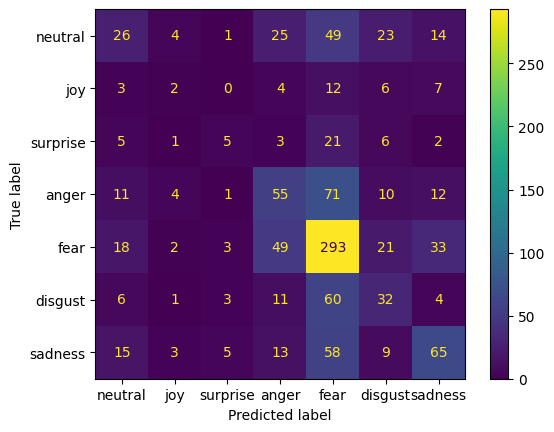

In [50]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_true=y_val, y_pred=emotion_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)
cm_display.plot()
plt.show()

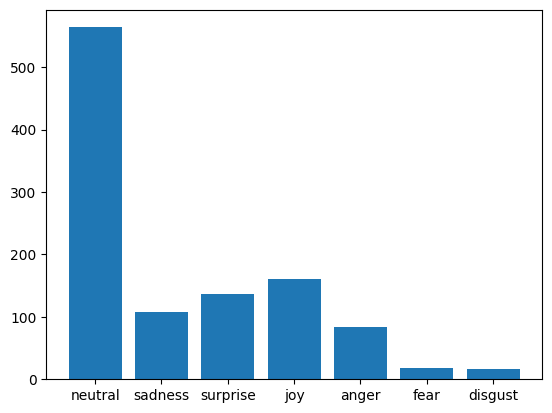

In [57]:
emotion_counts = {emotion:emotion_preds.count(emotion) for emotion in emotion_preds}

emotions = list(emotion_counts.keys())
counts = list(emotion_counts.values())

plt.bar(emotions, counts)
plt.show()

In [65]:
print(metrics.classification_report(y_true=y_val, y_pred=emotion_preds))

              precision    recall  f1-score   support

       anger       0.31      0.18      0.23       142
     disgust       0.12      0.06      0.08        34
        fear       0.28      0.12      0.16        43
         joy       0.34      0.34      0.34       164
     neutral       0.52      0.70      0.60       419
     sadness       0.30      0.27      0.29       117
    surprise       0.47      0.39      0.43       168

    accuracy                           0.44      1087
   macro avg       0.33      0.29      0.30      1087
weighted avg       0.41      0.44      0.42      1087



In [70]:
X_test = np.asarray(X_test)
test_preds = model.predict([X_test, X_test_vec])
index_to_label = {index: label for index, label in enumerate(labels)}

test_class_preds = [np.argmax(pred) for pred in test_preds]
test_emotion_preds = [index_to_label[idx] for idx in test_class_preds]

81/81 [==============================] - 3s 37ms/step


In [71]:
print(metrics.classification_report(y_true=y_test, y_pred=test_emotion_preds))

              precision    recall  f1-score   support

       anger       0.30      0.17      0.22       333
     disgust       0.06      0.04      0.05        79
        fear       0.12      0.07      0.09        56
         joy       0.40      0.33      0.36       429
     neutral       0.55      0.69      0.61      1121
     sadness       0.20      0.17      0.19       241
    surprise       0.43      0.45      0.44       307

    accuracy                           0.45      2566
   macro avg       0.30      0.28      0.28      2566
weighted avg       0.42      0.45      0.43      2566



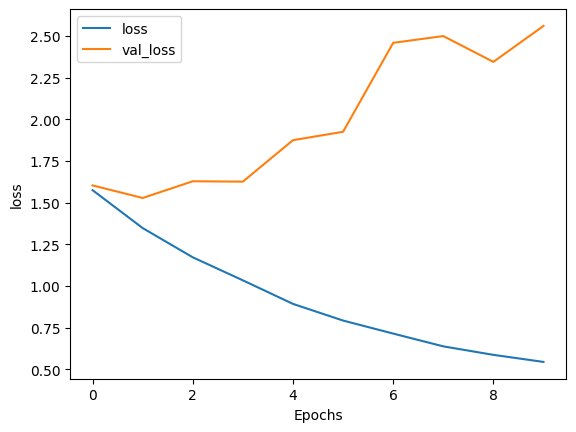

In [37]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_graphs(history,'loss')

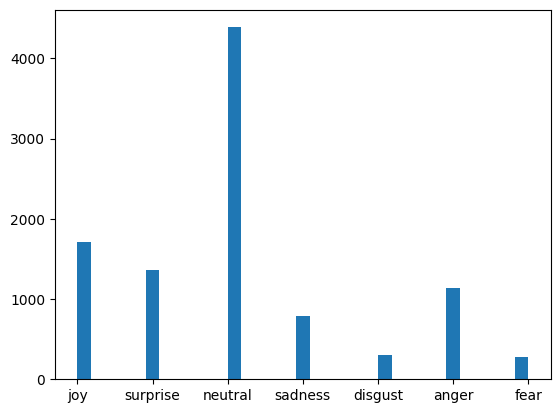

In [36]:
_ = plt.hist(y_train, bins='auto')
plt.show()

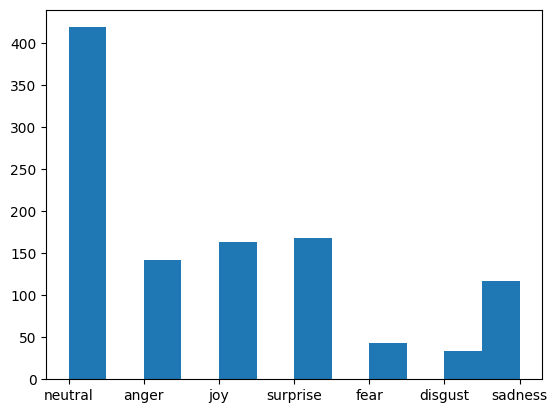

In [35]:
_ = plt.hist(y_val, bins='auto')
plt.show()

In [ ]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self,**kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.add = tf.keras.layers.Add() 
    self.layernorm = tf.keras.layers.LayerNormalization()

  def call(self, x, y, **kwargs):
    attn, attention_scores = self.mha(
             query=x, value=y,
             return_attention_scores=True)

    self.last_attention_scores = attention_scores

    x = self.add([x, attn])
    return self.layernorm(x)

# bert

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("Hub version: ", hub.__version__)

TF version:  2.9.2
Hub version:  0.16.1


In [3]:
import tensorflow_hub as hub
import tensorflow as tf
from bert.tokenization import FullTokenizer     
from tensorflow.keras.models import Model

In [7]:
max_seq_length = 90
num_classes = 7

import os

os.environ["TFHUB_MODEL_LOAD_FORMAT"] = "UNCOMPRESSED"

input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,),
                                       dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,),
                                   dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,),
                                    dtype=tf.int32,
                                    name="segment_ids")
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

dense_layer1 = tf.keras.layers.Dense(128, activation='relu')(pooled_output)
dense_layer2 = tf.keras.layers.Dense(num_classes, activation='softmax')(dense_layer1)

model = tf.keras.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=dense_layer2)

2024-04-15 15:40:53.392482: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2024-04-15 15:41:02.324077: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-15 15:41:02.326025: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [61]:
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=[pooled_output, sequence_output])

In [80]:
def get_masks(tokens, max_seq_length):
    """Mask for padding"""
    if len(tokens)>max_seq_length:
        print(len(tokens))
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))


def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))


def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids


In [63]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

contained text preprocessing

In [77]:
text_data = json.loads(text_data_path.read_text())

def get_conversation_from_json(json_convo):
    convo = []
    emotions = []
    filenames = []
    for line_idx in range(len(json_convo)):
        convo += [json_convo[line_idx]['text']]
        emotions += [json_convo[line_idx]['emotion']]
        filenames += [json_convo[line_idx]['video_name'][:-4]]
    return convo, emotions, filenames

convos = []
all_emotions = []
all_filenames = []
for convo_idx in range(len(text_data)):
    convo, emotions, filenames = get_conversation_from_json(text_data[convo_idx]['conversation'])
    convos += convo
    all_emotions += emotions
    all_filenames += filenames

data_dict = {'filename': all_filenames, 'conversation' : convos, 'emotion': all_emotions}

import pandas as pd

df = pd.DataFrame(data_dict)
df.head()

import contractions

# used to clean the text of a conversation
def clean_text(doc):
    # expand contractions
    doc = contractions.fix(doc)
    return doc

df['clean_conversation'] = df['conversation'].apply(lambda convo: clean_text(convo))

all_filenames = df['filename'].tolist()
all_text = df['clean_conversation'].tolist()
all_labels = df['emotion'].tolist()

print(all_filenames)
print(all_text)
print(all_labels)

X_train_text = []
y_train_text = []

pathlist = (mel_dir / 'train').rglob('*.tiff')

for path in pathlist:
    extra = len(str(mel_dir / 'train'))+1
    str_path = str(path)
    fname = str_path[extra:-5] 
    idx = all_filenames.index(fname)
    text = all_text[idx]
    label = all_emotions[idx]
    
    X_train_text.append(text)
    y_train_text.append(label)

X_val_text = []
y_val_text = []

pathlist = (mel_dir / 'dev').rglob('*.tiff')

for path in pathlist:
    extra = len(str(mel_dir / 'dev'))+1
    str_path = str(path)
    fname = str_path[extra:-5] 
    idx = all_filenames.index(fname)
    text = all_text[idx]
    label = all_emotions[idx]
    
    X_val_text.append(text)
    y_val_text.append(label)


X_test_text = []
y_test_text = []

pathlist = (mel_dir / 'test').rglob('*.tiff')

for path in pathlist:
    extra = len(str(mel_dir / 'test'))+1
    str_path = str(path)
    fname = str_path[extra:-5] 
    idx = all_filenames.index(fname)
    text = all_text[idx]
    label = all_emotions[idx]
    
    X_test_text.append(text)
    y_test_text.append(label)

labels = ['neutral', 'joy', 'surprise', 'anger', 'fear', 'disgust', 'sadness']
num_classes = len(labels)
label_to_index = {label: index for index, label in enumerate(labels)}
index_to_label = {index: label for index, label in enumerate(labels)}

train_idx_label = [label_to_index[label] for label in y_train_text]
y_train_text_onehot = tf.one_hot(train_idx_label, len(labels)).numpy()

val_idx_label = [label_to_index[label] for label in y_val_text]
y_val_text_onehot = tf.one_hot(val_idx_label, len(labels)).numpy()

test_idx_label = [label_to_index[label] for label in y_test_text]
y_test_text_onehot = tf.one_hot(test_idx_label, len(labels)).numpy()

['dia1utt1', 'dia1utt2', 'dia1utt3', 'dia1utt4', 'dia1utt5', 'dia1utt6', 'dia1utt7', 'dia1utt8', 'dia2utt1', 'dia2utt2', 'dia2utt3', 'dia3utt1', 'dia3utt2', 'dia3utt3', 'dia3utt4', 'dia3utt5', 'dia3utt6', 'dia3utt7', 'dia3utt8', 'dia3utt9', 'dia4utt1', 'dia4utt2', 'dia4utt3', 'dia5utt1', 'dia5utt2', 'dia5utt3', 'dia6utt1', 'dia6utt2', 'dia6utt3', 'dia6utt4', 'dia6utt5', 'dia6utt6', 'dia6utt7', 'dia6utt8', 'dia6utt9', 'dia6utt10', 'dia7utt1', 'dia7utt2', 'dia7utt3', 'dia7utt4', 'dia7utt5', 'dia7utt6', 'dia7utt7', 'dia7utt8', 'dia7utt9', 'dia7utt10', 'dia8utt1', 'dia8utt2', 'dia8utt3', 'dia8utt4', 'dia8utt5', 'dia8utt6', 'dia8utt7', 'dia8utt8', 'dia8utt9', 'dia8utt10', 'dia8utt11', 'dia8utt12', 'dia8utt13', 'dia8utt14', 'dia8utt15', 'dia8utt16', 'dia8utt17', 'dia9utt1', 'dia9utt2', 'dia9utt3', 'dia9utt4', 'dia9utt5', 'dia9utt6', 'dia10utt1', 'dia10utt2', 'dia10utt3', 'dia10utt4', 'dia10utt5', 'dia11utt1', 'dia11utt2', 'dia11utt3', 'dia11utt4', 'dia11utt5', 'dia12utt1', 'dia12utt2', 'dia1

In [78]:
def preprocess_text(X):
    tokenized_X = [tokenizer.tokenize(text) for text in X]
    input_ids = [get_ids(tokens, tokenizer, max_seq_length) for tokens in tokenized_X]
    input_masks = [get_masks(tokens, max_seq_length) for tokens in tokenized_X]
    input_segments = [get_segments(tokens, max_seq_length) for tokens in tokenized_X]

    return np.array(input_ids), np.array(input_masks), np.array(input_segments)

In [91]:
max_seq_length = 90

train_input_ids, train_input_masks, train_input_segments = preprocess_text(X_train_text)
val_input_ids, val_input_masks, val_input_segments = preprocess_text(X_val_text)
test_input_ids, test_input_masks, test_input_segments = preprocess_text(X_test_text)

In [101]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 90)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 90)]         0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 90)]         0           []                               
                                                                                                  
 keras_layer_3 (KerasLayer)     [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 90, 768)]                 'input_mask[0][0]',       

In [102]:
history = model.fit(
    x={"input_word_ids": train_input_ids,
       "input_mask": train_input_masks,
       "segment_ids": train_input_segments},
    y=y_train_text_onehot,
    validation_data=(
        {"input_word_ids": val_input_ids,
         "input_mask": val_input_masks,
         "segment_ids": val_input_segments},
        y_val_text_onehot
    ),
    epochs=5,  
    batch_size=32  
)

Epoch 1/5


2024-04-11 23:20:11.127065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - ETA: 0s - loss: 1.4974 - accuracy: 0.4731

2024-04-11 23:24:20.200746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - 290s 909ms/step - loss: 1.4974 - accuracy: 0.4731 - val_loss: 1.5087 - val_accuracy: 0.4747
Epoch 2/5
312/312 [==============================] - 313s 1s/step - loss: 1.4115 - accuracy: 0.5040 - val_loss: 1.4867 - val_accuracy: 0.4729
Epoch 3/5
312/312 [==============================] - 379s 1s/step - loss: 1.3718 - accuracy: 0.5205 - val_loss: 1.4882 - val_accuracy: 0.4747
Epoch 4/5
312/312 [==============================] - 455s 1s/step - loss: 1.3541 - accuracy: 0.5344 - val_loss: 1.4568 - val_accuracy: 0.4885
Epoch 5/5
312/312 [==============================] - 447s 1s/step - loss: 1.3448 - accuracy: 0.5301 - val_loss: 1.4772 - val_accuracy: 0.4830


In [ ]:
import sys
from absl import flags
sys.argv=['preserve_unused_tokens=False']
flags.FLAGS(sys.argv)

In [67]:
s0 = "hi how are you"

stokens0_ = tokenizer.tokenize(s0)

#stokens0 = ["[CLS]"] + stokens0_ + ["[SEP]"]
stokens0 = stokens0_

input_ids0 = get_ids(stokens0, tokenizer, max_seq_length)
input_masks0 = get_masks(stokens0, max_seq_length)
input_segments0 = get_segments(stokens0, max_seq_length)

print(stokens0)
print(input_ids0)
print(input_masks0)
print(input_segments0)

['hi', 'how', 'are', 'you']
[7632, 2129, 2024, 2017, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [71]:
input_ids0 = np.array([input_ids0])
input_masks0 = np.array([input_masks0])
input_segments0 = np.array([input_segments0])

In [72]:
pool_embs0, all_embs0 = bert_model.predict([input_ids0,input_masks0,input_segments0])

2024-04-11 22:40:50.551395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step


In [74]:
print(pool_embs0.shape)
print(all_embs0.shape)

(1, 768)
(1, 30, 768)
